# 1B2. Práctica: Cálculo de frecuencias a nivel de palabras
### Alumna: Jessica Nicole Bracamonte Dzib
Crear un notebook para preprocesar el texto y convertirlo a minúsculas, quitar acentos y los siguientes caracteres:

`";:,.\\-\"'/()[]¿?¡!{}~<>|«»-—’\t\n\r"`

In [166]:
#librerías que utilizaremos:
import re
import unicodedata
import matplotlib.pyplot as plt
#import nltk
#from nltk.corpus import stopwords
#nltk.download('stopwords')

In [167]:
#leemos y guardamos los textos.
file1 = open( 'libro_1.txt', 'r' )
libro1= file1.read()

file2 = open( 'libro_2.txt', 'r' )
libro2 = file2.read()

In [168]:
#convertimos los textos a minúsculas:
libro1_1 = libro1.lower()
libro2_1 = libro2.lower()

In [169]:
# definimos una función para quitar los acentos:
def remover_acentos(texto):
  return ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')
   

In [170]:
libro1_2= remover_acentos(libro1_1)
libro2_2 = remover_acentos(libro2_1)

In [185]:
#reemplazamos los saltos de página por espacios usando re:
libro1_4 = re.sub(r"\n", " ", libro1_2)
libro2_4 = re.sub(r"\n", " ", libro2_2)

In [186]:
#quitamos caracteres especiales usando re:
libro1_final = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\r]", "", libro1_4)
libro2_final = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\r]", "", libro2_4)

## Inciso 1
Calcular las frecuencias a nivel de palabras de los siguientes documentos.
- Libro 1 = `libro1_final`
- Libro 2 = `libro2_final`

Generar los histogramas para cada archivo.

In [187]:
#creamos una función para generar las frecuencias de las palabras.
def contador_palabras(texto):
    palabras = re.findall(r'\w+', texto)

    conteo = {}

    for palabra in palabras:
        conteo[palabra] = conteo.get(palabra, 0) + 1

    frecuencias_orden = sorted(conteo.items(), key=lambda item: item[1], reverse=True)


    return frecuencias_orden

In [188]:
frecc_libro1 = contador_palabras(libro1_final)
frecc_libro2 = contador_palabras(libro2_final)

In [189]:
#Definimos una función para graficar los histogramas
def histograma(frecuencias, texto, limite, titulo):
    palabras_top = frecuencias[:limite]
    palabras, valores = zip(*palabras_top)
    
    plt.bar(palabras, valores)
    plt.xlabel("Palabras")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation = 90)
    plt.title(f"Frecuencias de palabras en {titulo}")
    plt.show()

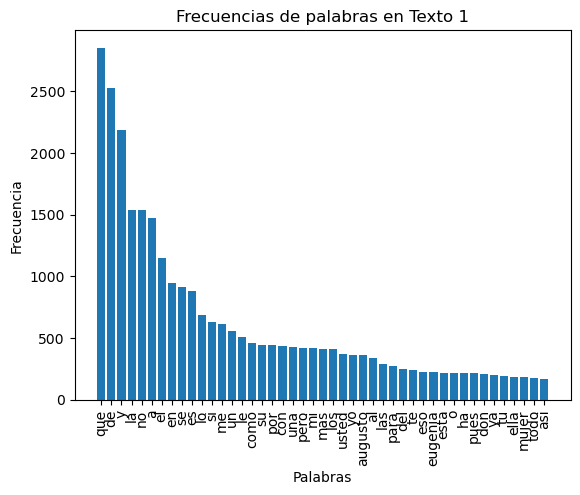

In [190]:
histograma(frecc_libro1, libro1_final, 45, 'Texto 1')

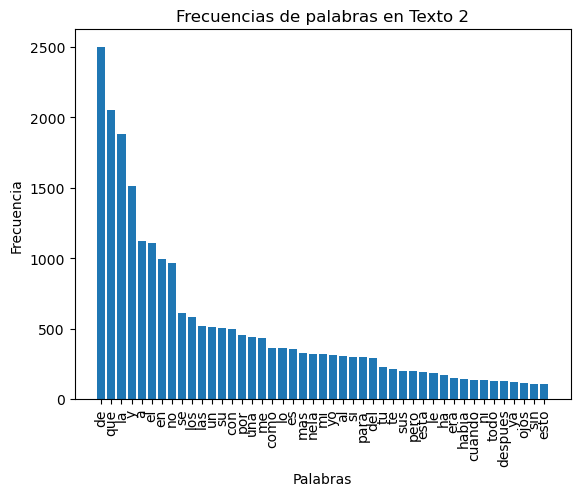

In [191]:
histograma(frecc_libro2, libro2_final, 45,'Texto 2')

## Inciso 2 
En el notebook, responder las siguientes preguntas:

- ¿Cuántas palabras hay en cada texto?

- ¿Cuántas palabras diferentes (palabras únicas) hay en el texto?

- ¿Cuántas son las palabras con frecuencia 1 (hapax legomena) en el texto? 

- Generar los histogramas de todos los documentos.  Para generar los histogramas, ordenar las palabras de acuerdo a la frecuencia de mayor a menor. Si el número de datos es excesivo y difícil de visualizar, presente los datos que considere convenientes, para que se aprecien, de forma adecuada, los datos graficados.

----
Para responder las preguntas anteriores, definimos una nueva función que nos regresará la información de cada libro.

In [192]:
def analisis(texto):
    palabras = re.findall(r'\w+', texto)

    conteo = {}
    for palabra in palabras:
        conteo[palabra] = conteo.get(palabra, 0) + 1

    total_palabras = sum(conteo.values())

    palabras_unicas = len(conteo)    

    hapax_legomena = len(set(palabra for palabra, frecuencia in conteo.items() if frecuencia == 1))

    return total_palabras, palabras_unicas, hapax_legomena

### Análisis Libro 1
- ¿Cuántas palabras hay en el Libro 1? `56,814 palabras.`
- ¿Cuántas palabras diferentes (palabras únicas) hay en el Libro 1? `7,782 palabras.`
- ¿Cuántas son las palabras con frecuencia 1 (hapax legomena) en el Libro 1?  `4,694 palabras.`

In [193]:
total, unicas, hapax = analisis(libro1_final)

print("Total de palabras en Libro 1:", total)
print("Palabras únicas en Libro 1:", unicas)
print("Hapax legomena en Libro 1:", hapax)

Total de palabras en Libro 1: 56814
Palabras únicas en Libro 1: 7782
Hapax legomena en Libro 1: 4694


Del total de 7,782 de palabras únicas el 60.37%% (4,694 palabras) son palabras con frecuencia 1. Sin embargo, las hapax logomena solo constituyen el 8.26% del total de palabras en el Libro 1. Por lo que el 91.74% del libro está constituido por la repetición de las mismas 3,088 palabras, es decir, el 39.68% de las palabras únicas constituyen más del 90% del libro 1.

Dados los porcentajes, podemos decir que existe un nivel considerable de riqueza en el vocabulario, y que al mismo tiempo este vocabulario es opacado por la gran cantidad de palabras no únicas en el texto.

### Análisis Libro 2
- ¿Cuántas palabras hay en el Libro 2? `50,540 palabras.`
- ¿Cuántas palabras diferentes (palabras únicas) hay en el Libro 2? `8,496 palabras`
- ¿Cuántas son las palabras con frecuencia 1 (hapax legomena) en el Libro 2? `5,213 palabras`

In [194]:
total, unicas, hapax = analisis(libro2_final)

print("Total de palabras en Libro 2:", total)
print("Palabras únicas en Libro 2:", unicas)
print("Hapax legomena en Libro 2:", hapax)

Total de palabras en Libro 2: 50540
Palabras únicas en Libro 2: 8496
Hapax legomena en Libro 2: 5213


Del total de 8,496 palabras únicas, el 61.43% (5213 palabras) son palabras con frecuencia 1. Sin embargo, las hapax legomena constituyen únicamente el 10.31% del total de palabras en el Libro 2. Por lo tanto, el 89.69% del libro está constituido por la repetición de las mismas 3,283 palabras; o en otras palabras, el 38.65% de las palabras únicas constituyen casi el 90% del Libro 2.

Dados los porcentajes, podemos decir que en el Libro 2 también existe un alto nivel de riqueza en el vocabulario, y al mismo tiempo, este vocabulario queda reducido a ser aproximadamente el 10% de la totalidad del libro.

##### - Generar los histogramas de todos los documentos.  Para generar los histogramas, ordenar las palabras de acuerdo a la frecuencia de mayor a menor. Si el número de datos es excesivo y difícil de visualizar, presente los datos que considere convenientes, para que se aprecien, de forma adecuada, los datos graficados.

### Histograma del Libro 1 con las 45 palabras más frencuentes:

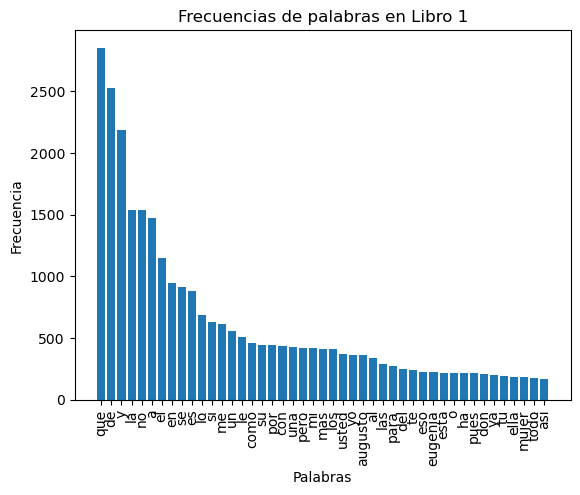

In [195]:
histograma(frecc_libro1, libro1_final, 45, 'Libro 1')

En el histograma observamos que un grupo de palabras ( "que", "de", "y") concentra un alto porcentaje de ocurrencias, seguidos por un siguiente nivel de ocurrencias medias-altas con frecuencias similares ("la", "no", "a"), y un tercer nivel de ocurrencias medias bajas que de igual manera cuentan con una frecuencua similar ("el", "en", "se", "es"). 
Gracias a la visualización del histograma es evidente que pasando estos niveles las frecuencias siguen decreciendo de manera gradual y no drásticamente como las primeras 11 palabras más frecuentes.

### Histograma del Libro 2 con las 45 palabras más frencuentes:

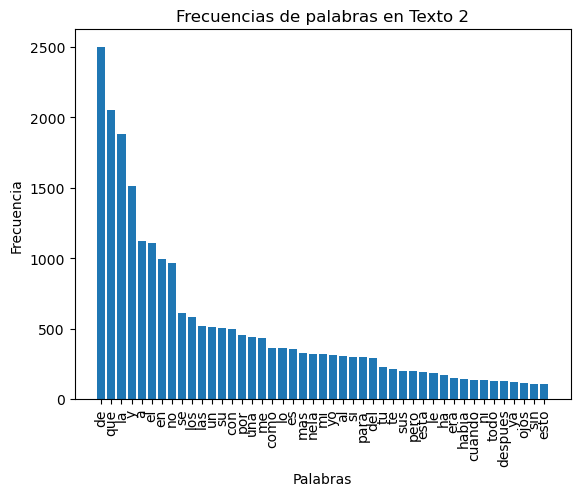

In [196]:
histograma(frecc_libro2, libro2_final, 45,'Texto 2')

Al igual que el histograma del texto anterior, observamos que un pequeño grupo de palabras ("de", "que", "la", "y") concentra un alto porcentaje de las ocurrencias, seguido de un grupo con ocurrencias medias ("a", "el", "en", "o"). En la visualización del histograma podemos observar que pasando estás 8 palabras de frecuencia alta, las frecuencias de las siguientes palabras decrece de manera gradual y no drásticamente como es el caso de las palabras más frecuentes.